In [24]:
import numpy as np
import pandas as pd
import pickle
import gc
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_bins(df, col, n_bins=10, code=False):
    if not code:
        bins = pd.cut(df[col], bins=n_bins)
        bins = bins.value_counts()
        bins = bins.sort_index()
        bins.to_csv(f'bins/{col}_{n_bins}.sv')
        plt.bar(range(len(bins)), bins.values, tick_label=np.arange(1, len(bins)+1)/len(bins))
        plt.xticks(fontsize=10);
        
    else:
        fig, ax = plt.subplots(1, 2, figsize=(20, 8))
        var = len(df[df.isna()[col]])
        df = df[~df.isna()[col]]
        var2 = len(df)
        bins = pd.cut(df[col], bins=n_bins)
        bins = bins.value_counts()
        bins = bins.sort_index()
        bins.to_csv(f'bins/{col}_{n_bins}.sv')
        ax[0].bar(range(len(bins)), bins.values, tick_label=np.arange(1, len(bins)+1)/len(bins))
        ax[0].tick_params(axis='both', labelsize=12)
        
        temp = pd.DataFrame({'Nan': [var], 'NotNan': [var2]}, index=['Nan amount'])
        temp.plot(ax=ax[1], kind='bar', stacked=True, width=0.05)
        ax[1].axis('off')
        ax[1].legend(bbox_to_anchor=(0.7, 0.5), prop={'size': 15})

In [15]:
plt.rcParams["figure.figsize"] = (13, 8)

### Group Ratio

In [2]:
with open("gr.bin", "rb") as f:
    gr = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["gr"])

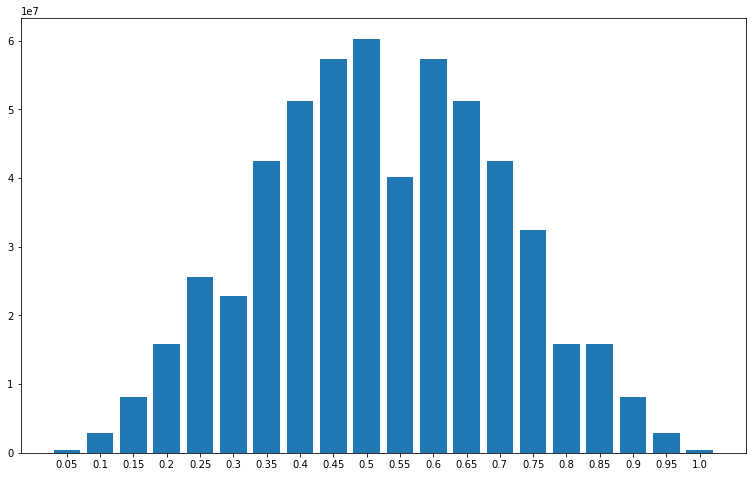

In [149]:
plot_bins(gr, 'gr', 20)

In [206]:
# del gr
# gc.collect()
# gc.get_stats()

[{'collections': 2986, 'collected': 39202, 'uncollectable': 0},
 {'collections': 295, 'collected': 46036, 'uncollectable': 0},
 {'collections': 14, 'collected': 167146, 'uncollectable': 0}]

### Imbalance Ratio

In [3]:
with open("ir.bin", "rb") as f:
    ir = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["ir"])

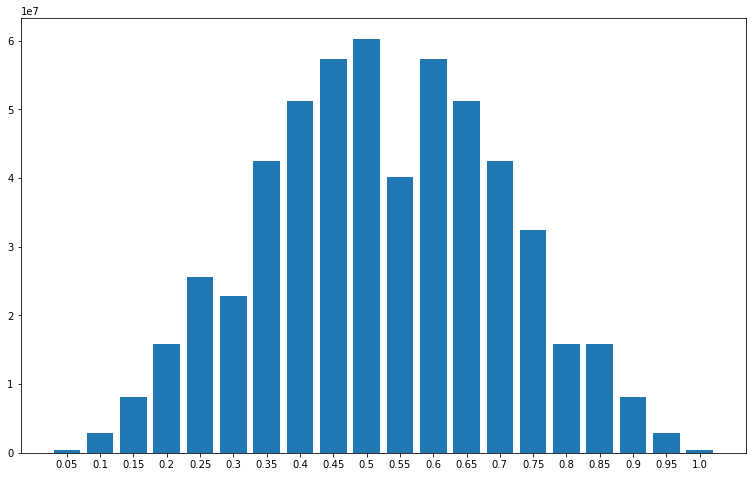

In [156]:
plot_bins(ir, 'ir', 20)

### Check

array([[<AxesSubplot:title={'center':'gr'}>]], dtype=object)

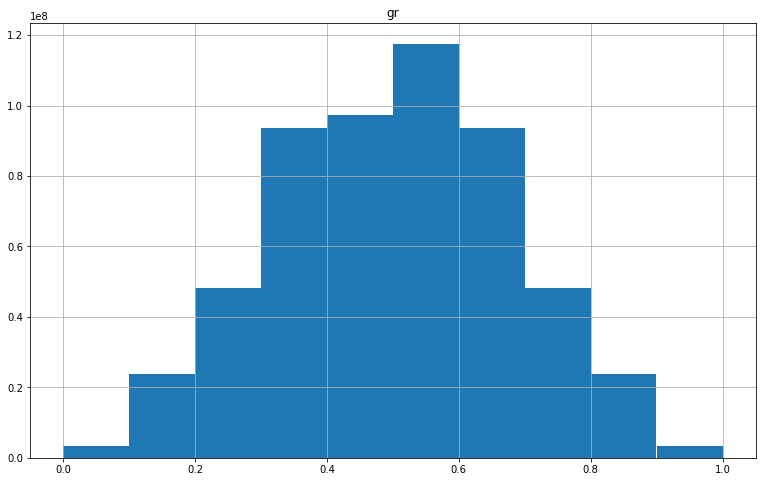

In [165]:
gr.hist()

array([[<AxesSubplot:title={'center':'ir'}>]], dtype=object)

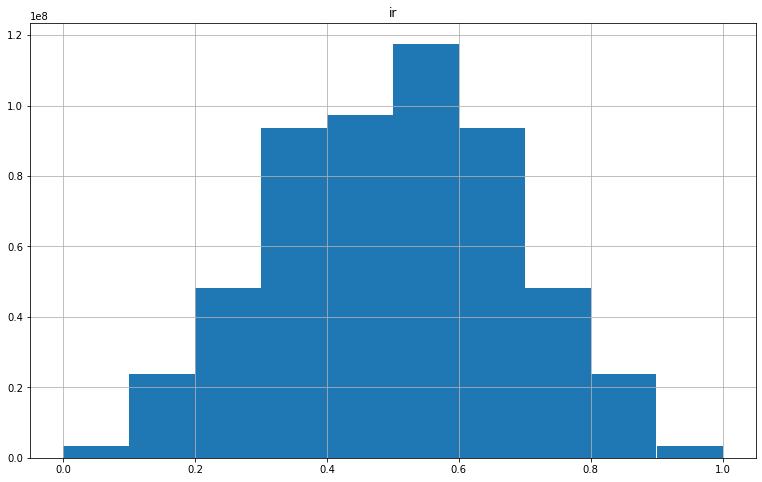

In [166]:
ir.hist()

In [3]:
with open("i_tpr.bin", "rb") as f:
    i_tpr = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["i_tpr"])
with open("j_tpr.bin", "rb") as f:
    j_tpr = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["j_tpr"])

### i_ true positive ratio

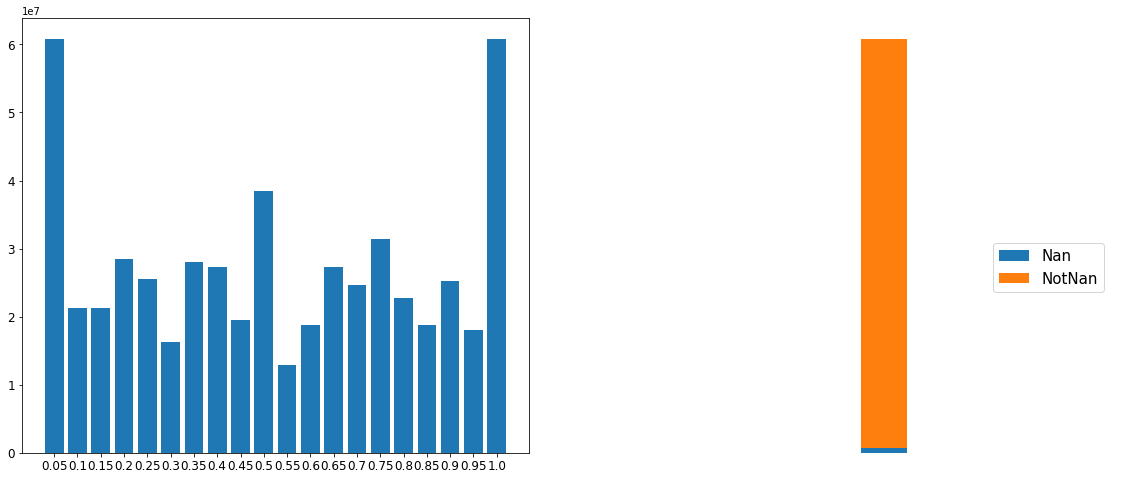

In [4]:
plot_bins(i_tpr, 'i_tpr', 20, True)

### j_ true positive ratio

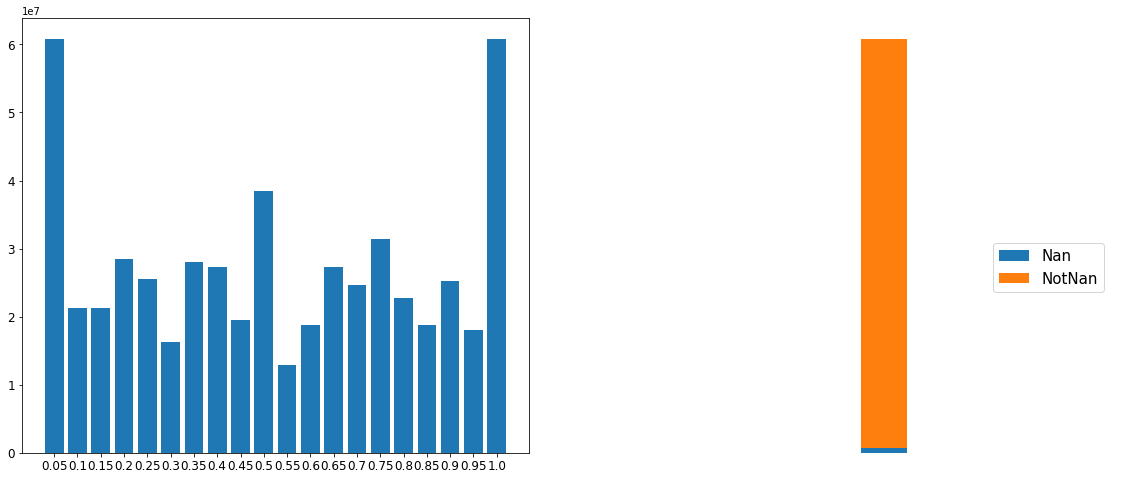

In [5]:
plot_bins(j_tpr, 'j_tpr', 20, True)

In [6]:
with open("i_fpr.bin", "rb") as f:
    i_fpr = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["i_fpr"])
with open("j_fpr.bin", "rb") as f:
    j_fpr = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["j_fpr"])

### i_ false positive ratio

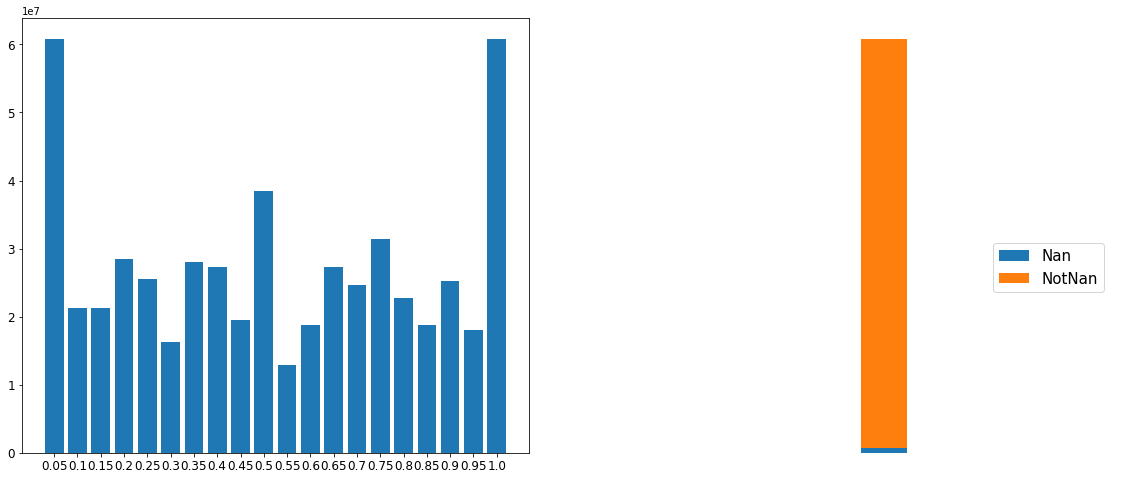

In [7]:
plot_bins(i_fpr, 'i_fpr', 20, True)

### i_ false positive ratio

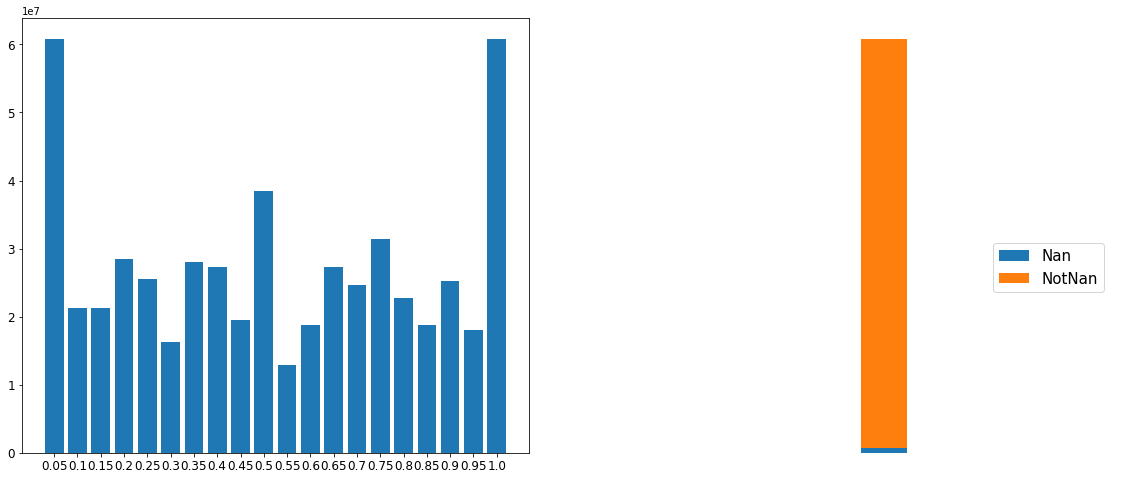

In [8]:
plot_bins(j_fpr, 'j_fpr', 20, True)

In [20]:
with open("i_ppv.bin", "rb") as f:
    i_ppv = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["i_ppv"])
with open("j_ppv.bin", "rb") as f:
    j_ppv = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["j_ppv"])

### i_ positive predictive value

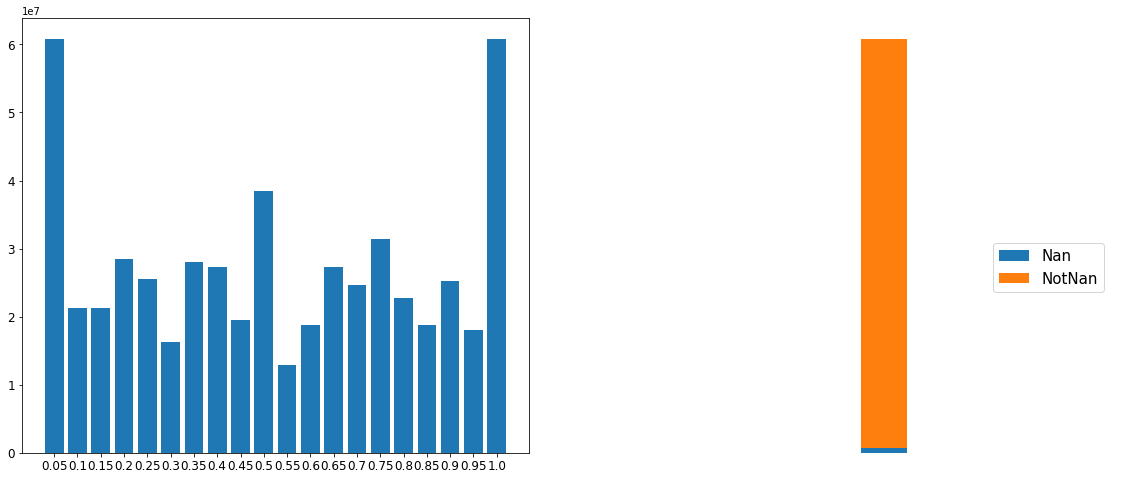

In [21]:
plot_bins(i_ppv, 'i_ppv', 20, True)

### j_ positive predictive value

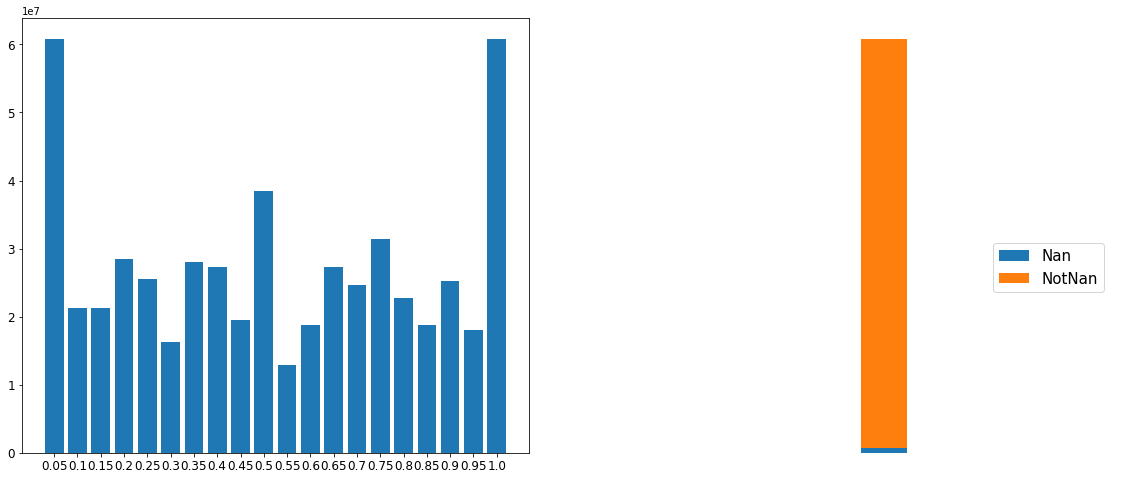

In [22]:
plot_bins(j_ppv, 'j_ppv', 20, True)

In [3]:
with open("i_npv.bin", "rb") as f:
    i_npv = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["i_npv"])
with open("j_npv.bin", "rb") as f:
    j_npv = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["j_npv"])

### i_ negative predictive value

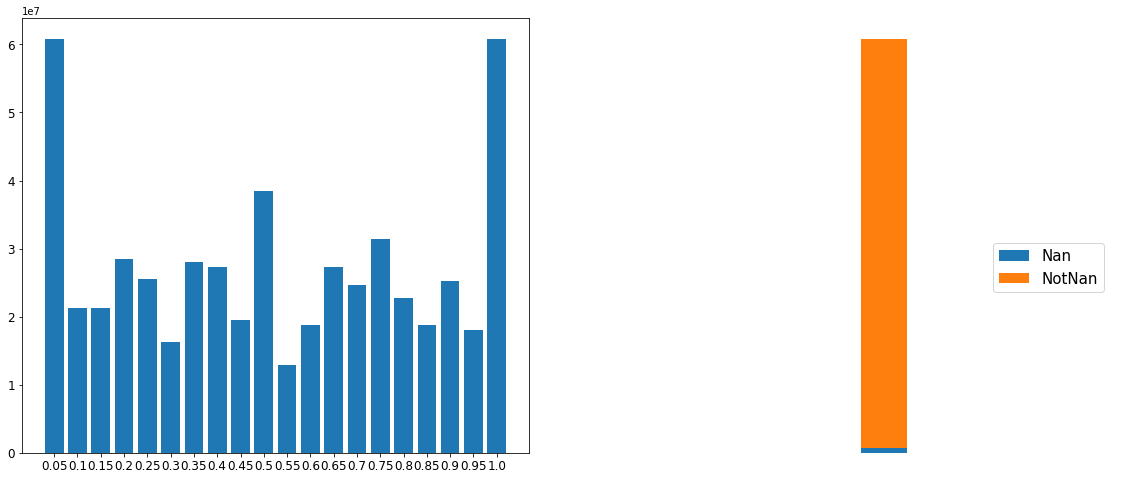

In [4]:
plot_bins(i_npv, 'i_npv', 20, True)

### i_ negative predictive value

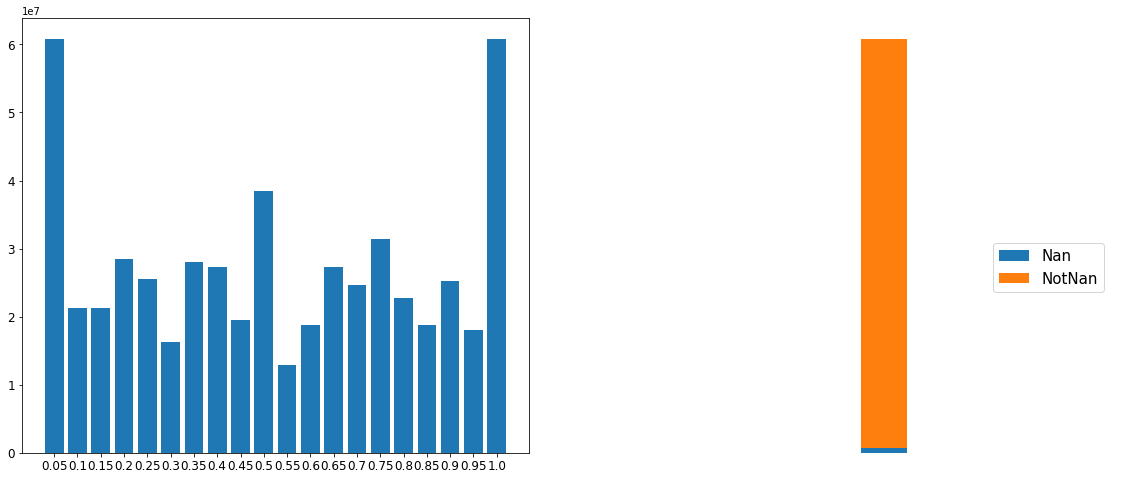

In [5]:
plot_bins(j_npv, 'j_npv', 20, True)

In [19]:
# with open("equal_opp_diff.bin", "rb") as f:
#     equal_opp_diff = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["equal_opp_diff"])

In [20]:
# df = pd.concat([gr, ir], axis=1)
# df = pd.concat([df, equal_opp_diff], axis=1)

In [21]:
ir_selected = [0.25, 0.5, 0.75]
gr_selected = [0.25, 0.5, 0.75]
df = df.loc[df.ir.isin(ir_selected) & df.gr.isin(gr_selected)]

In [28]:
df

,gr,ir,equal_opp_diff
116160,0.25,0.75,NaN
116161,0.25,0.75,NaN
116163,0.25,0.75,NaN
116166,0.25,0.75,NaN
116170,0.25,0.75,NaN
...,...,...,...
552946150,0.75,0.50,0.0
552946164,0.75,0.75,0.0
552946178,0.75,0.25,NaN
552946192,0.75,0.50,0.0


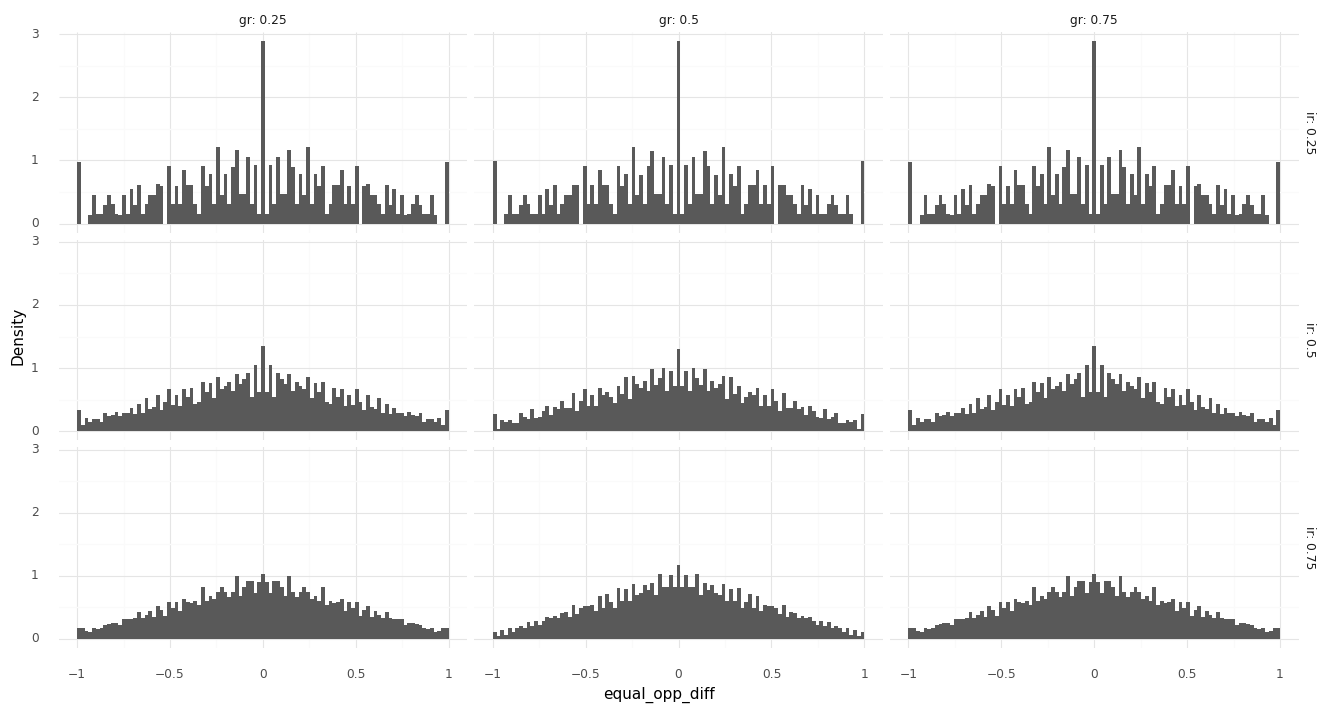

In [31]:
metric = "equal_opp_diff"
fig = (
    ggplot(df, aes(x=metric, y=after_stat('density')))
    + geom_histogram(bins=100)
    + facet_grid('ir~gr', labeller = 'label_both')
    + theme_minimal()
    + theme(figure_size=(16, 8))
    + ylab("Density")
)
print(fig)